In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings(action="ignore")

import os
import missingno as msno
from scipy.stats import norm, skew 
from scipy import stats
from matplotlib.pyplot import figure



<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

In [118]:
df=pd.read_csv('CC_.csv')
print(df.shape)
df.head(3)
df=df.set_index('CUST_ID',drop=True)
df

(8950, 18)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


In [119]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [120]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<AxesSubplot:>

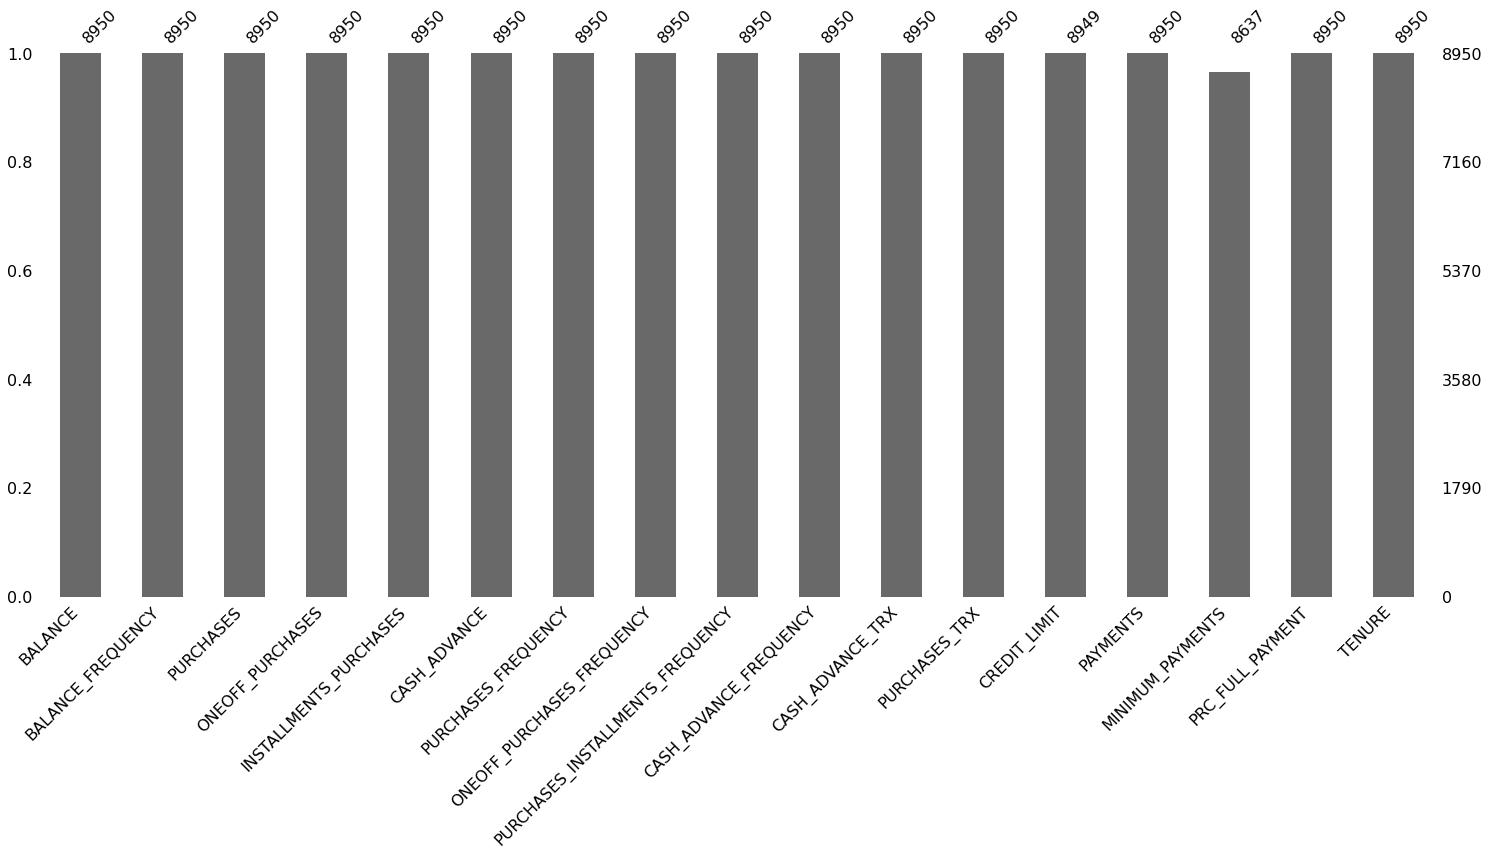

In [121]:
msno.bar(df)
# ALMOST NO NANS EXCEPT MINIMUM PAYMENTS

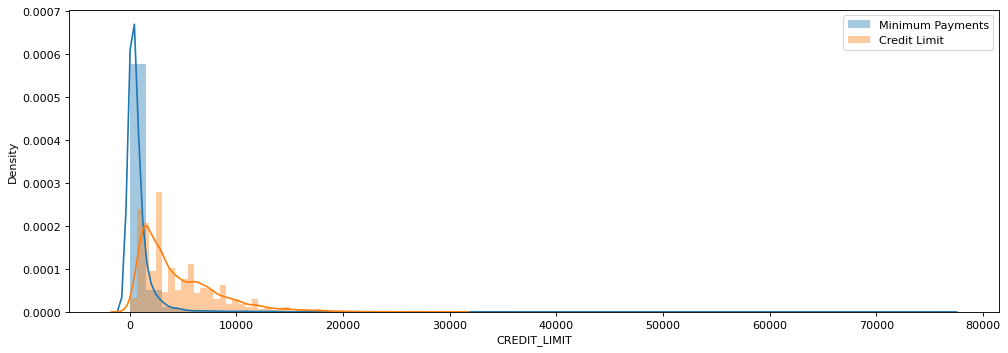

In [206]:
figure(figsize=(15,5), dpi=80)
sns.distplot(df['MINIMUM_PAYMENTS'],label='Minimum Payments')
sns.distplot(df['CREDIT_LIMIT'],label='Credit Limit')
plt.legend()
df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

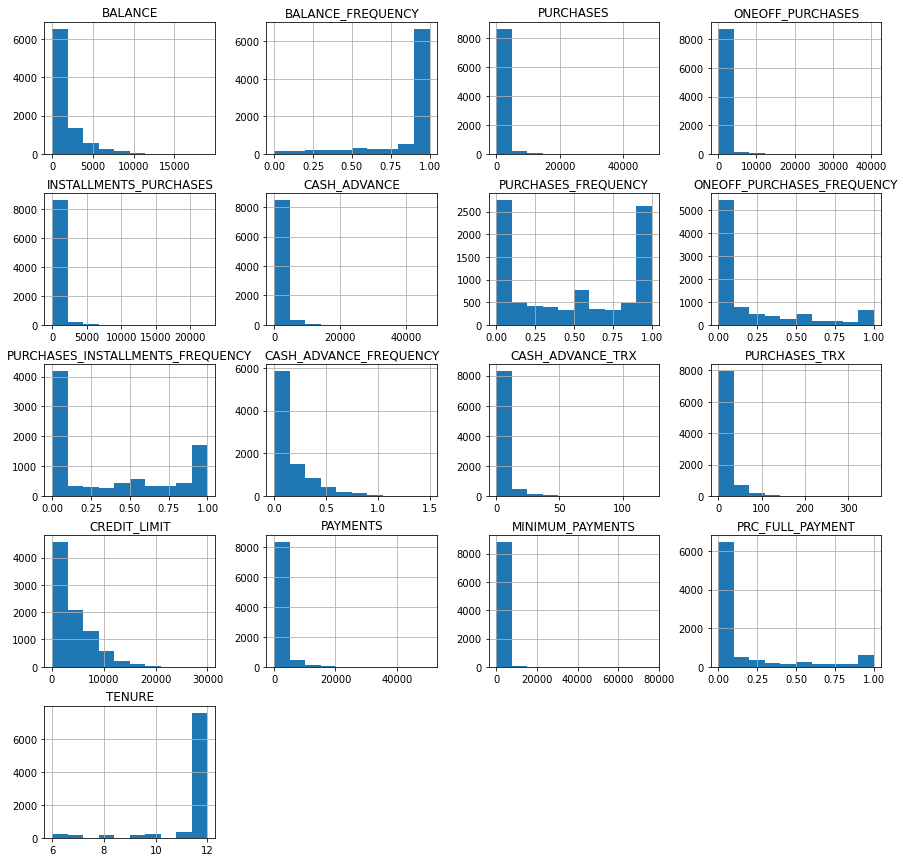

In [208]:
df.hist(figsize=(15,15))
# MOST OF THE COLUMNS ARE STRONGLY RIGHT SKEWED WHICH SAYS THERE ARE LOT OF POPULATION RATION THAT HAS LOW PAYMENTS, PURCHASES ETC

<AxesSubplot:>

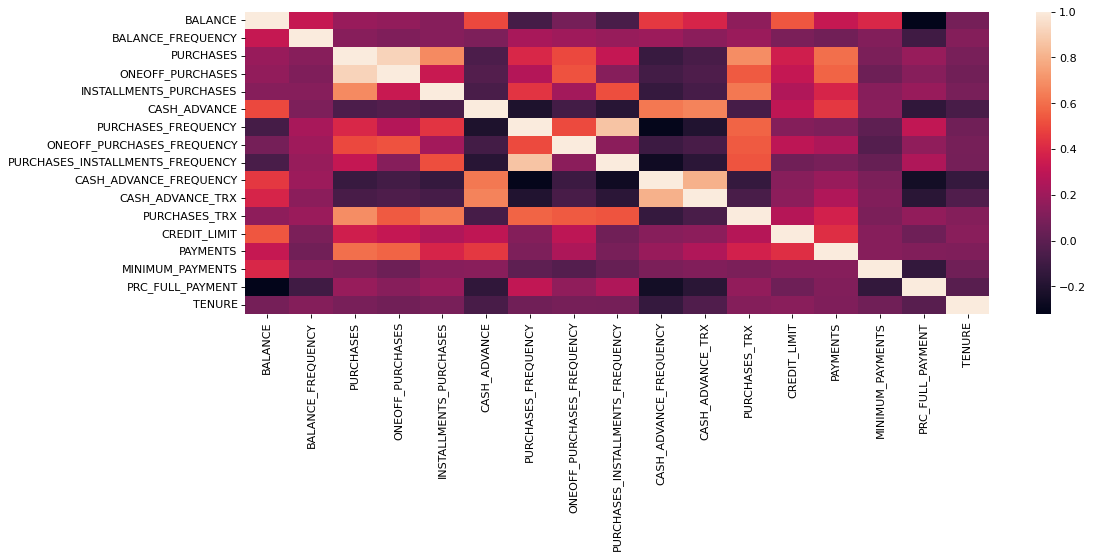

In [59]:
figure(figsize=(15,5), dpi=80)
sns.heatmap(df.corr())

In [114]:
corr=df.corr(method='pearson')
corr1=corr[corr>0.6]
corr2=corr1[corr1!=1]
corr2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BALANCE_FREQUENCY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PURCHASES,NaN,NaN,NaN,0.916845,0.679896,NaN,NaN,NaN,NaN,NaN,NaN,0.689561,NaN,0.603264,NaN,NaN,NaN
ONEOFF_PURCHASES,NaN,NaN,0.916845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INSTALLMENTS_PURCHASES,NaN,NaN,0.679896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.628108,NaN,NaN,NaN,NaN,NaN
CASH_ADVANCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.628522,0.656498,NaN,NaN,NaN,NaN,NaN,NaN
PURCHASES_FREQUENCY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.862934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ONEOFF_PURCHASES_FREQUENCY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PURCHASES_INSTALLMENTS_FREQUENCY,NaN,NaN,NaN,NaN,NaN,NaN,0.862934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CASH_ADVANCE_FREQUENCY,NaN,NaN,NaN,NaN,NaN,0.628522,NaN,NaN,NaN,NaN,0.799561,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'CASH_ADVANCE_FREQUENCY vs CASH_ADVANCE_TRX')

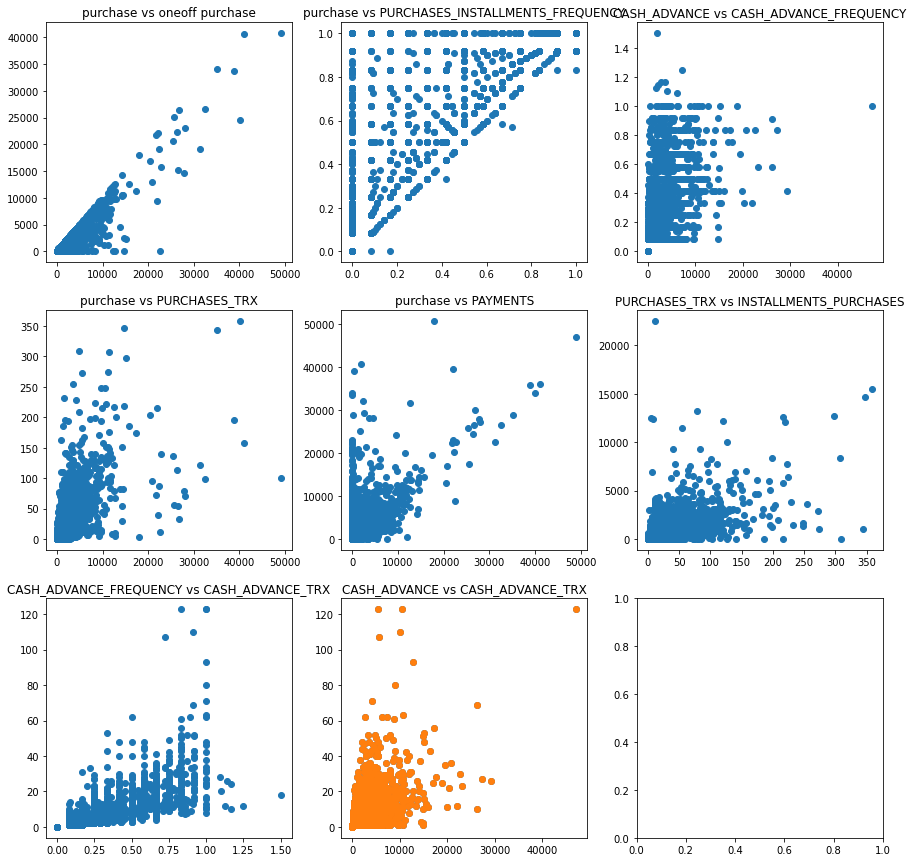

In [105]:
fig, axs = plt.subplots(3,3, figsize=(15,15))
axs[0,0].scatter(df['PURCHASES'],df['ONEOFF_PURCHASES'])
axs[0,0].set_title('purchase vs oneoff purchase')
axs[0,1].scatter(df['PURCHASES_INSTALLMENTS_FREQUENCY'],df['PURCHASES_FREQUENCY'])
axs[0,1].set_title('purchase vs PURCHASES_INSTALLMENTS_FREQUENCY')
axs[1,0].scatter(df['PURCHASES'],df['PURCHASES_TRX'])
axs[1,0].set_title('purchase vs PURCHASES_TRX')
axs[1,1].scatter(df['PURCHASES'],df['PAYMENTS'])
axs[1,1].set_title('purchase vs PAYMENTS')
axs[0,2].scatter(df['CASH_ADVANCE'],df['CASH_ADVANCE_FREQUENCY'])
axs[0,2].set_title('CASH_ADVANCE vs CASH_ADVANCE_FREQUENCY')
axs[1,2].scatter(df['PURCHASES_TRX'],df['INSTALLMENTS_PURCHASES'])
axs[1,2].set_title('PURCHASES_TRX vs INSTALLMENTS_PURCHASES')
axs[2,1].scatter(df['CASH_ADVANCE'],df['CASH_ADVANCE_TRX'])
axs[2,1].set_title('CASH_ADVANCE vs CASH_ADVANCE_TRX')
axs[2,1].scatter(df['CASH_ADVANCE'],df['CASH_ADVANCE_TRX'])
axs[2,1].set_title('CASH_ADVANCE vs CASH_ADVANCE_TRX')
axs[2,0].scatter(df['CASH_ADVANCE_FREQUENCY'],df['CASH_ADVANCE_TRX'])
axs[2,0].set_title('CASH_ADVANCE_FREQUENCY vs CASH_ADVANCE_TRX')
## CAN SEE LOT OF CORRELATED FEATURES

In [209]:
scaler=StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [210]:
df_scaled1=pd.DataFrame(df_scaled,columns=df.columns,index=df.index)
df_scaled1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
C10002,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
C10003,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
C10004,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068
C10005,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


Text(0.5, 1.0, 'elbow')

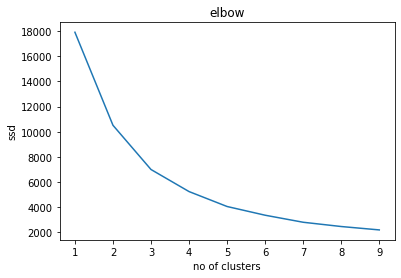

In [194]:
X=df_scaled1[['BALANCE','PAYMENTS']]
ssd=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)
plt.plot(range(1,10),ssd)
plt.xlabel('no of clusters')
plt.ylabel('ssd')
plt.title('elbow')

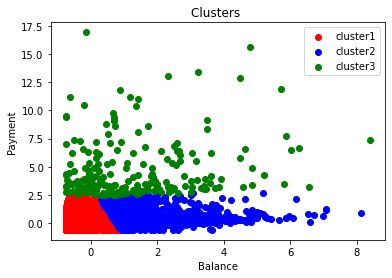

In [195]:
kmeans1=KMeans(n_clusters=3,random_state=42).fit(X)
y_kmeans1 = kmeans1.fit_predict(X)
X['cluster']=y_kmeans1
plt.scatter(X[X.cluster==0].iloc[:,0],X[X.cluster==0].iloc[:,1],label='cluster1',color='red')
plt.scatter(X[X.cluster==1].iloc[:,0],X[X.cluster==1].iloc[:,1],label='cluster2',color='blue')
plt.scatter(X[X.cluster==2].iloc[:,0],X[X.cluster==2].iloc[:,1],label='cluster3',color='green')
plt.title('Clusters ')
plt.xlabel('Balance')
plt.ylabel('Payment')
plt.legend()
plt.show()
## SAYS THAT
## 1. PEOPLE WITH LOW BALANCE HAS DONE LESS PAYMENTS
## 2. ANOTHER GROUP OF POPULATION HAS MEDIUM BALANCE AND HAVE LOW PAYMENT
## 3. 3RD POPULATION HAS MORE BALANCE AND HAS MORE PAYMENT

Text(0.5, 1.0, 'elbow')

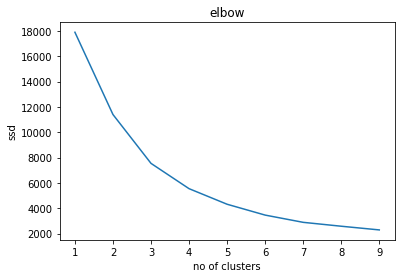

In [223]:
X2=df_scaled1[['BALANCE','PURCHASES']]
ssd=[]
for i in range(1,10):
    kmeans2=KMeans(n_clusters=i,random_state=42)
    kmeans2.fit(X2)
    ssd.append(kmeans2.inertia_)
plt.plot(range(1,10),ssd)
plt.xlabel('no of clusters')
plt.ylabel('ssd')
plt.title('elbow')

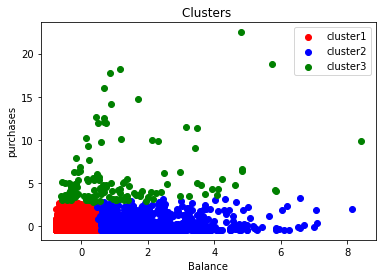

In [228]:
kmeans2=KMeans(n_clusters=3,random_state=42).fit(X)
y_kmeans2 = kmeans2.fit_predict(X2)
X2['cluster']=y_kmeans2
plt.scatter(X2[X2.cluster==0].iloc[:,0],X2[X2.cluster==0].iloc[:,1],label='cluster1',color='red')
plt.scatter(X2[X2.cluster==1].iloc[:,0],X2[X2.cluster==1].iloc[:,1],label='cluster2',color='blue')
plt.scatter(X2[X2.cluster==2].iloc[:,0],X2[X2.cluster==2].iloc[:,1],label='cluster3',color='green')

plt.title('Clusters ')
plt.xlabel('Balance')
plt.ylabel('purchases')
plt.legend()
plt.show()
## PEOPLE WITH LOW BALANCE TEND TO MAKE MORE PURCHASES AND PEOPLE WITH MORE BALANCES MAKES MORE PURCHASES

Text(0.5, 1.0, 'elbow')

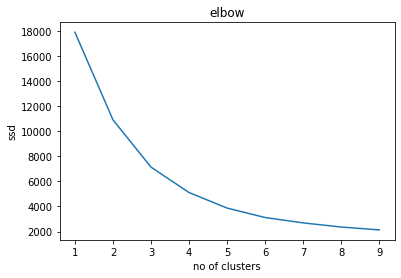

In [227]:
X3=df_scaled1[['CREDIT_LIMIT','PURCHASES']]
ssd=[]
for i in range(1,10):
    kmeans3=KMeans(n_clusters=i,random_state=42)
    kmeans3.fit(X3)
    ssd.append(kmeans3.inertia_)
plt.plot(range(1,10),ssd)
plt.xlabel('no of clusters')
plt.ylabel('ssd')
plt.title('elbow')

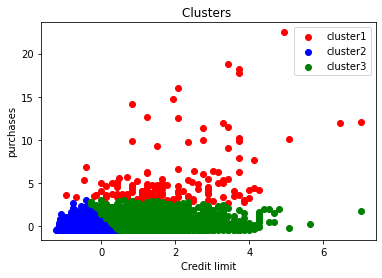

In [230]:
kmeans3=KMeans(n_clusters=3,random_state=42).fit(X)
y_kmeans3 = kmeans3.fit_predict(X3)
X3['cluster']=y_kmeans3
plt.scatter(X3[X3.cluster==0].iloc[:,0],X3[X3.cluster==0].iloc[:,1],label='cluster1',color='red')
plt.scatter(X3[X3.cluster==1].iloc[:,0],X3[X3.cluster==1].iloc[:,1],label='cluster2',color='blue')
plt.scatter(X3[X3.cluster==2].iloc[:,0],X3[X3.cluster==2].iloc[:,1],label='cluster3',color='green')

plt.title('Clusters ')
plt.xlabel('Credit limit')
plt.ylabel('purchases')
plt.legend()
plt.show()
## SAME BEHAVIOUR AS PREVIOUS CLUSTERS

Text(0.5, 1.0, 'elbow')

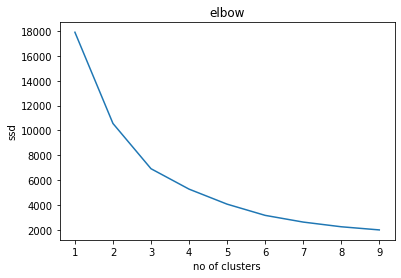

In [237]:
X4=df_scaled1[['PAYMENTS','PURCHASES']]
ssd1=[]
for i in range(1,10):
    kmeans4=KMeans(n_clusters=i,random_state=42)
    kmeans4.fit(X4)
    ssd1.append(kmeans4.inertia_)
plt.plot(range(1,10),ssd1)
plt.xlabel('no of clusters')
plt.ylabel('ssd')
plt.title('elbow')

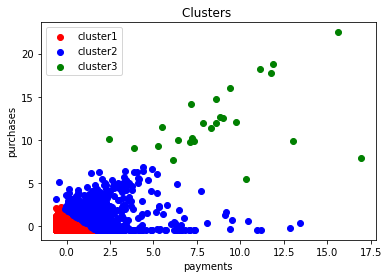

In [238]:
kmeans4=KMeans(n_clusters=3,random_state=42).fit(X)
y_kmeans4 = kmeans4.fit_predict(X4)
X4['cluster']=y_kmeans4
plt.scatter(X4[X4.cluster==0].iloc[:,0],X4[X4.cluster==0].iloc[:,1],label='cluster1',color='red')
plt.scatter(X4[X4.cluster==1].iloc[:,0],X4[X4.cluster==1].iloc[:,1],label='cluster2',color='blue')
plt.scatter(X4[X4.cluster==2].iloc[:,0],X4[X4.cluster==2].iloc[:,1],label='cluster3',color='green')

plt.title('Clusters ')
plt.xlabel('payments')
plt.ylabel('purchases')
plt.legend()
plt.show()
## SAME AS PREVIOUS CLUSTERS,  PAYMENTS AND PURCHASES TEND TO GO SIDE BY SIDE

Text(0.5, 1.0, 'elbow')

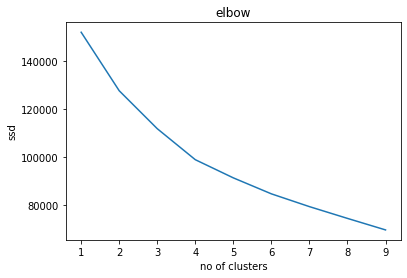

In [241]:
## PCA
df_scaled1
ssd2=[]
for i in range(1,10):
    kmeans5=KMeans(n_clusters=i,random_state=42)
    kmeans5.fit(df_scaled1)
    ssd2.append(kmeans5.inertia_)
plt.plot(range(1,10),ssd2)
plt.xlabel('no of clusters')
plt.ylabel('ssd')
plt.title('elbow')

In [262]:
kmeans_pca=KMeans(n_clusters=4,random_state=42).fit(X)
y_kmeans5 = kmeans_pca.fit_predict(df_scaled1)
df_scaled1['cluster']=y_kmeans5
df_scaled1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
CUST_ID,,,,,,,,,,,,,,,,,,
C10001,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.360680,0
C10002,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.360680,2
C10003,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.360680,3
C10004,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.360680,0
C10005,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.360680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.486217,-3.498541e-01,1.183951,-4.122768,3
C19187,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.503396,4.878305e-17,-0.525551,-4.122768,3
C19188,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960433,-0.570615,-3.354655e-01,0.329200,-4.122768,3


In [271]:
pca = PCA(n_components=2)
pca.fit(df_scaled1[df_scaled1.columns[:-1]])
print(pca.explained_variance_ratio_)


[0.27290037 0.20301991]


,pca1,pca2,cluster
0,-1.682220,-1.076450,0
1,-1.138295,2.506477,2
2,0.969684,-0.383521,3
3,-0.873628,0.043166,0
4,-1.599434,-0.688581,0
...,...,...,...
8945,-0.359629,-2.016145,3
8946,-0.564369,-1.639123,3
8947,-0.926204,-1.810786,3
8948,-2.336552,-0.657966,0


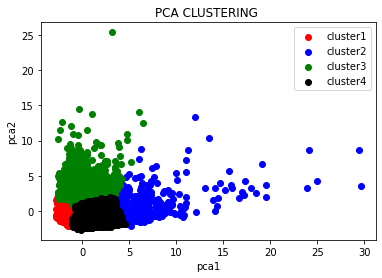

In [273]:
pca_df=pca.transform(df_scaled1[df_scaled1.columns[:-1]])
pca_data=pd.DataFrame(pca_df,columns={'pca1','pca2'})
pca_data['cluster']=y_kmeans5
plt.scatter(pca_data[pca_data.cluster==0].iloc[:,0],pca_data[pca_data.cluster==0].iloc[:,1],label='cluster1',color='red')
plt.scatter(pca_data[pca_data.cluster==1].iloc[:,0],pca_data[pca_data.cluster==1].iloc[:,1],label='cluster2',color='blue')
plt.scatter(pca_data[pca_data.cluster==2].iloc[:,0],pca_data[pca_data.cluster==2].iloc[:,1],label='cluster3',color='green')
plt.scatter(pca_data[pca_data.cluster==3].iloc[:,0],pca_data[pca_data.cluster==3].iloc[:,1],label='cluster4',color='black')

plt.title('PCA CLUSTERING ')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.legend()
plt.show()